In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
train = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/train'
test = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/test'
validation = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/val'

SIZE = 224
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 45, 
    zoom_range = 0.2,
    shear_range = 0.2,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

validation_generator = train_datagen.flow_from_directory(
    validation,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

test_generator = train_datagen.flow_from_directory(
    test,
    target_size = (SIZE, SIZE),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True,
    seed = 42
)

Found 704 images belonging to 8 classes.
Found 88 images belonging to 8 classes.
Found 88 images belonging to 8 classes.


In [ ]:
mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in mobile.layers:
  layer.trainable = False

x = mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x)

model = Model(inputs=mobile.input, outputs=x)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
# tf.saved_model.save(mobile, '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/saved_model')

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 100,
    verbose = 2
)

Epoch 1/100
22/22 - 372s - loss: 1.3328 - accuracy: 0.5384 - val_loss: 0.8287 - val_accuracy: 0.7500 - 372s/epoch - 17s/step
Epoch 2/100
22/22 - 20s - loss: 0.7397 - accuracy: 0.7500 - val_loss: 0.6348 - val_accuracy: 0.7727 - 20s/epoch - 886ms/step
Epoch 3/100
22/22 - 18s - loss: 0.5068 - accuracy: 0.8381 - val_loss: 0.4254 - val_accuracy: 0.8295 - 18s/epoch - 838ms/step
Epoch 4/100
22/22 - 19s - loss: 0.3507 - accuracy: 0.8864 - val_loss: 0.4788 - val_accuracy: 0.8182 - 19s/epoch - 877ms/step
Epoch 5/100
22/22 - 19s - loss: 0.3021 - accuracy: 0.8977 - val_loss: 0.3452 - val_accuracy: 0.9091 - 19s/epoch - 875ms/step
Epoch 6/100
22/22 - 18s - loss: 0.2355 - accuracy: 0.9233 - val_loss: 0.2275 - val_accuracy: 0.9205 - 18s/epoch - 837ms/step
Epoch 7/100
22/22 - 20s - loss: 0.2751 - accuracy: 0.8977 - val_loss: 0.2960 - val_accuracy: 0.8977 - 20s/epoch - 899ms/step
Epoch 8/100
22/22 - 19s - loss: 0.2531 - accuracy: 0.9091 - val_loss: 0.3964 - val_accuracy: 0.8864 - 19s/epoch - 842ms/step


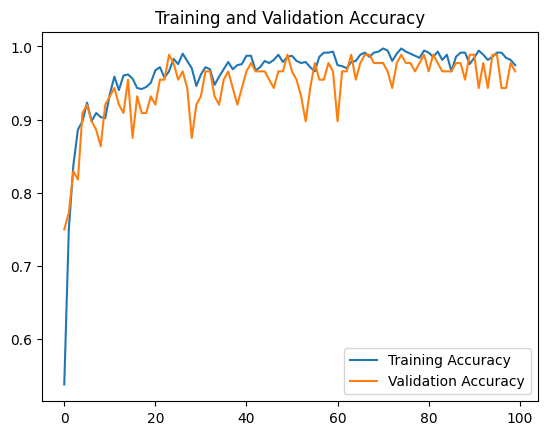

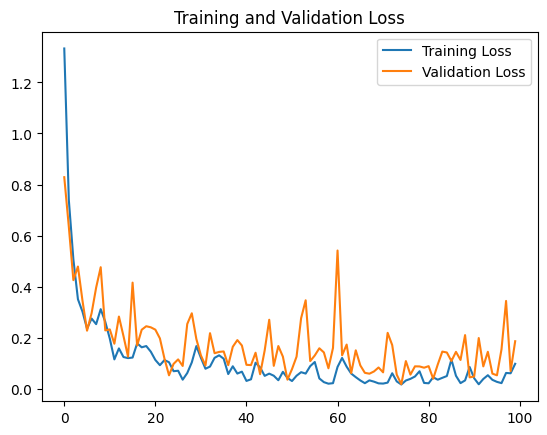

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

# Training and Validation Accuracy
plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 0)
plt.figure()

# Training and Validation Loss
plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.evaluate(test_generator, verbose=2)

3/3 - 28s - loss: 0.2472 - accuracy: 0.9432 - 28s/epoch - 9s/step


[0.2471955418586731, 0.9431818127632141]

In [ ]:
export_dir = '/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/saved_model3'
tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('/content/drive/MyDrive/Capstone Project/ML Colab/Dataset/Fix/saved_model3/ml.tflite')
tflite_model_file.write_bytes(tflite_model)

12801192